<a href="https://colab.research.google.com/github/ongks-useR/united_states_bike_share/blob/main/bike_share_analysis_N_visualization_with_Python_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Import Library***

In [ ]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import  matplotlib.font_manager as fm
import seaborn as sns

%matplotlib inline

from functools import reduce

## ***Matplotlib Reference***

In [ ]:
# style sheets for matplotlib
# https://matplotlib.org/stable/tutorials/introductory/customizing.html
# https://matplotlib.org/3.3.4/gallery/style_sheets/style_sheets_reference.html
# https://python-graph-gallery.com/199-matplotlib-style-sheets/
# https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
# apply style with plt.style.use(style_name)

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [ ]:
'''
fonts available in Matplotlib

Humor Sans >> Humor Sans
LiberationMono >> Liberation Mono
LiberationSans >> Liberation Sans
LiberationSansNarrow >> Liberation Sans Narrow

follow up >> https://stackoverflow.com/questions/51810908/custom-fonts-in-google-colaboratory-matplotlib-charts/51844978#51844978

''' 

fonts = pd.Series(fm.findSystemFonts())
fonts = fonts.str.split('\/', expand=True).get(6)
fonts = fonts.str.split(".", expand=True).get(0)
fonts = fonts.str.replace("Bold|Italic|Regular", "").str.replace("-"," ").str.strip()
set(fonts)

{'Humor Sans',
 'LiberationMono',
 'LiberationSans',
 'LiberationSansNarrow',
 'LiberationSerif'}

In [ ]:
# Default paramters in Matplotlib

plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [ ]:
# colormap reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html

# text reference: https://matplotlib.org/stable/tutorials/text/text_intro.html

## ***Exploratory Data Analysis***

In [ ]:
file = '/content/drive/MyDrive/New York Bike Share/new_york_bikeshare_2019.csv'

col_type = {
    'duration': np.float32,
    'user_type': 'category',
    'generation': 'category',
    'gender': 'category',
    'distance': np.float32,
    'speed': np.float32
}

# self defined function to create dataframe
def create_df(f, size = 100_000):

    # create chunks of data frame with 100K per chunk. Result is an iteratable of dataframes
    result = pd.read_csv(f, chunksize=size, dtype=col_type, header=0, parse_dates=['time_start'])
    
    # store each dataframe in list
    result = [chunk for chunk in result]

    # merge all dataframes
    result = pd.concat(result, ignore_index=True)

    return result

In [ ]:
df = create_df(file)

In [ ]:
df.head()

,duration,time_start,station_name_start,station_name_end,user_type,generation,gender,distance,speed
0,5.3,2019-01-01 00:01:47.401,Central Park West & W 76 St,W 89 St & Columbus Ave,Subscriber,gen_x,Male,1.067,12.1
1,5.3,2019-01-01 00:04:43.736,Pershing Square North,E 39 St & 2 Ave,Subscriber,baby_boomer,Male,0.578,6.5
2,9.8,2019-01-01 00:06:03.997,Amsterdam Ave & W 82 St,E 77 St & 3 Ave,Subscriber,gen_y,Male,2.034,12.5
3,5.0,2019-01-01 00:07:35.945,Great Jones St,E 20 St & Park Ave,Subscriber,gen_x,Male,1.316,15.8
4,8.9,2019-01-01 00:08:33.179,Frederick Douglass Blvd & W 115 St,Lenox Ave & W 130 St,Subscriber,gen_y,Female,1.328,9.0


In [ ]:
# reorganize variables

df = df.reindex(columns = ['time_start', 'station_name_start', 'station_name_end', 'user_type', 
                         'generation', 'gender', 'distance', 'duration', 'speed'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17595646 entries, 0 to 17595645
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   time_start          datetime64[ns]
 1   station_name_start  object        
 2   station_name_end    object        
 3   user_type           category      
 4   generation          category      
 5   gender              category      
 6   distance            float32       
 7   duration            float32       
 8   speed               float32       
dtypes: category(3), datetime64[ns](1), float32(3), object(2)
memory usage: 654.4+ MB


## ***Composition of User Type***

In [ ]:
user_group = df.groupby(by=['user_type'])[['gender']].count()\
                .rename(columns = {'gender': 'percentage'})\
                .transform(lambda x: (x * 100 / x.sum())).round().astype('int')

user_group

,percentage
user_type,
Customer,8
Subscriber,92


In [ ]:
labels = list(zip(user_group.index, user_group.percentage))

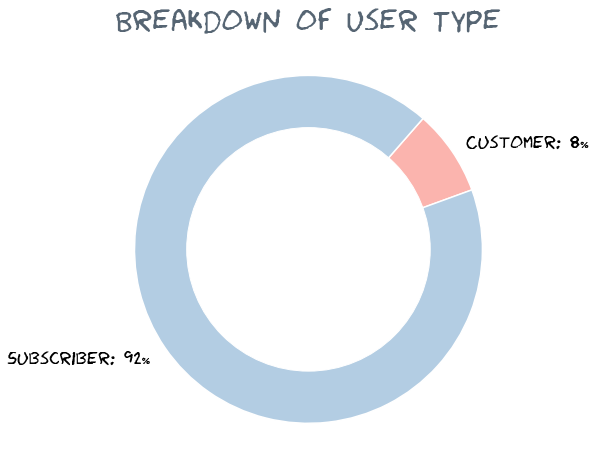

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Breakdown of User Type', 
            fontdict={'fontsize': 30, 'family': 'Humor Sans', 'fontstyle': 'italic', 'fontweight': 'bold', 'color': '#566573'})

# color based on 'Pastel1'
ax.pie(user_group.percentage.values, labels=[f'{idx}: {pct}%' for idx, pct in labels], 
        startangle=20, 
        colors=cm.Pastel1(np.arange(len(user_group.index))), 
        wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, 
        textprops={'fontsize': 18, 'family': 'Humor Sans'})

# creating a circle within pie chart
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

## ***Composition of Gender***

In [ ]:
gender_group = df.groupby(by=['gender'])[['user_type']].count()\
                    .rename(columns = {'user_type': 'percentage'})\
                    .transform(lambda x: (x * 100 / x.sum())).round().astype('int')

In [ ]:
gender_group

,percentage
gender,
Female,26
Male,74


In [ ]:
labels = list(zip(gender_group.index, gender_group.percentage))

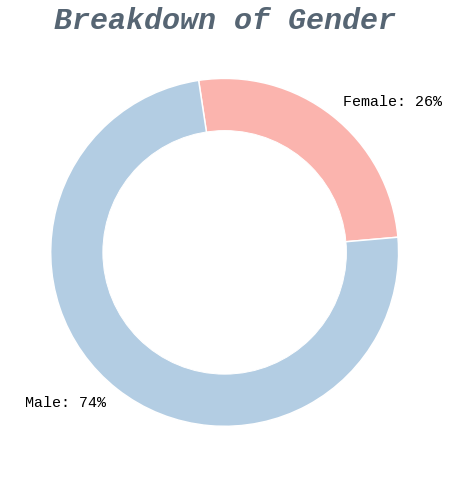

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Breakdown of Gender', 
             fontdict={'fontsize': 30, 'fontfamily': 'Liberation Mono', 'fontstyle': 'italic', 'fontweight': 'bold', 'color': '#566573'})

# color based on 'Pastel1'
ax.pie(gender_group.percentage.values, labels=[f'{idx}: {pct}%' for idx, pct in labels], 
       startangle=5, 
       colors=cm.Pastel1(np.arange(len(gender_group.index))), # color based on 'Pastel1'
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, 
       textprops={'fontsize': 15, 'fontfamily': 'Liberation Mono'})

circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

## ***Composition of Generation***

In [ ]:
generation_group = df.groupby(by = ['generation'])[['gender']].count()\
                    .rename(columns = {'gender': 'percentage'})\
                    .transform(lambda x: x * 100 / x.sum()).round(1)\
                    .sort_values(by = 'percentage', ascending = False)

In [ ]:
generation_group

,percentage
generation,
gen_y,54.4
gen_x,29.4
baby_boomer,13.0
gen_z,2.8
silent,0.5


In [ ]:
# rename index: replace underscore '_' with blank space & convert first letter to capital letter

generation_group.index = [idx.replace('_', ' ').title() for idx in generation_group.index]

In [ ]:
labels = list(zip(generation_group.index, generation_group.percentage))
labels

[('Gen Y', 54.4),
 ('Gen X', 29.4),
 ('Baby Boomer', 13.0),
 ('Gen Z', 2.8),
 ('Silent', 0.5)]

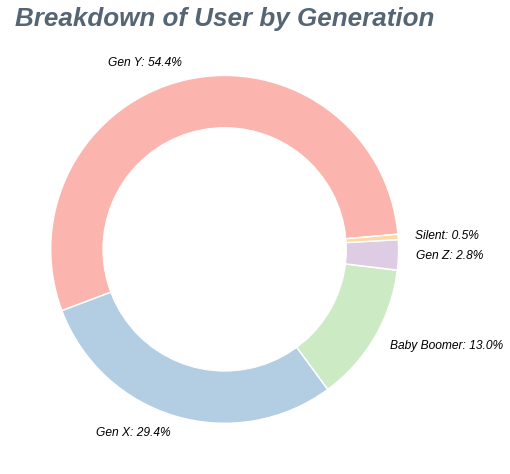

In [ ]:
# Option 1: Donut chart
# observation: % composition for 'Silent' generation is not presentable in Donut chart

fig, ax = plt.subplots(figsize = (8, 8))

ax.set_title('Breakdown of User by Generation', 
             fontdict={'fontsize': 26, 'fontfamily': 'Liberation Sans', 'fontstyle': 'italic', 'fontweight': 'bold', 'color': '#566573'})

# color based on 'Pastel1'
ax.pie(generation_group.percentage.values, labels=[f'{idx}: {pct}%' for idx, pct in labels], 
       startangle=5, 
       colors=cm.Pastel1(np.arange(len(generation_group.index))),
       wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}, 
       textprops={'fontsize': 12, 'fontfamily': 'Liberation Sans', 'fontstyle': 'italic'})

circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle);

In [ ]:
# sort 'percentage'

generation_group.sort_values(by = ['percentage'], inplace=True)

In [ ]:
generation_group

,percentage
Silent,0.5
Gen Z,2.8
Baby Boomer,13.0
Gen X,29.4
Gen Y,54.4


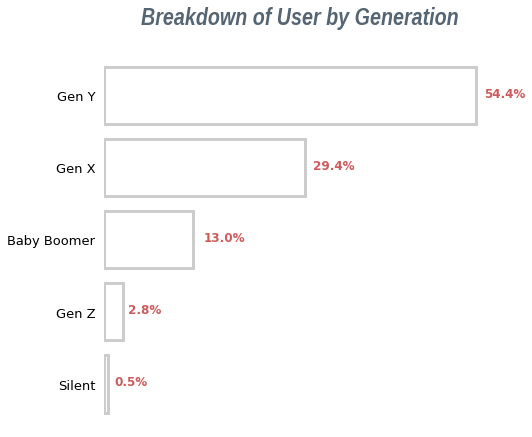

In [ ]:
# Option 2: Horizontal Bar chart

# set style sheet
# note: 'default' >> revert to Matplotlib default setting

with plt.style.context('seaborn-talk'):

    fig, ax = plt.subplots(figsize = (7, 7))

    # axes title
    ax.set_title('Breakdown of User by Generation', 
                fontdict={'fontsize': 24, 'fontfamily': 'Liberation Sans Narrow', 'fontstyle': 'italic', 'fontweight': 'bold', 'color': '#566573'}, 
                position = [0.5, 1.05])

    # plot the chart
    ax.barh(y=generation_group.index, width=generation_group.percentage, color='white', edgecolor=cm.Pastel2(7), linewidth=3)

    # remove spine
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # set position & linewidth of spine
    # ax.spines['left'].set_position(('outward', 2))
    # ax.spines['left'].set_linewidth(1.5)
    # ax.spines['left'].set_color('#AED6F1')

    # hide xticklabels
    ax.set_xticklabels([])

    # to hide ticks on x-axis & y-axis
    ax.tick_params(axis = 'both', length = 0)

    # percentage label on top of each bar
    yloc = ax.get_yticks()
    percent = generation_group.percentage.values

    for i in range(len(yloc), 0, -1):

        x_position = int(percent[i - 1]) + 1.5
        y_position = yloc[i - 1] - 0.02
        lab = percent[i - 1]

        ax.text(x_position, y_position, s = f"{lab}%" , size = 12, fontdict={'fontweight': 'bold', 'color': 'indianred'});

## ***Monthly Activity of Bike Sharing***

In [ ]:
monthly_trend = df.resample('M', on = 'time_start')[['gender']].count()\
                    .rename(columns = {'gender': 'record'})

monthly_trend

,record
time_start,
2019-01-31,882665
2019-02-28,855724
2019-03-31,1170845
2019-04-30,1500968
2019-05-31,1614135
2019-06-30,1761904
2019-07-31,1821874
2019-08-31,1941144
2019-09-30,2061890


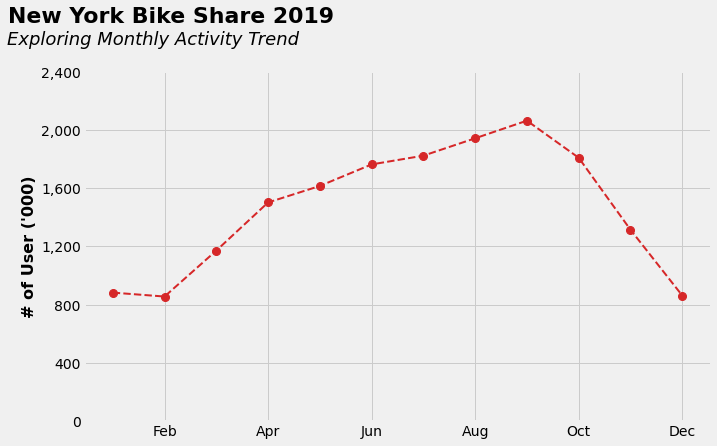

In [ ]:
# set temporary style sheet
# note: 'default' >> revert to Matplotlib default setting
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize = (10, 6))

    ax.plot(monthly_trend.index.month, monthly_trend.record.values, 
            color=cm.tab10(3), marker='o', markersize=8,
            linestyle='dashed', linewidth=2)
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.2, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Exploring Monthly Activity Trend', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.11, 1.06])
    
    # set axes ticks & ticklabels
    xloc = np.arange(2, 14, 2)
    xlab = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
    ax.set_xticks(xloc)
    ax.set_xticklabels(xlab)

    yloc = np.arange(0, 2.8e6, 0.4e6)
    ylab = [f"{int(num):,}" for num in yloc/1e3]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'});

In [ ]:
monthly_subscriber = df.loc[df.user_type == 'Subscriber', ['time_start']].reset_index()
monthly_subscriber = monthly_subscriber.assign(index = 1)
monthly_subscriber = monthly_subscriber.resample('M', on='time_start').sum().rename(columns={'index': 'subscriber'})
monthly_subscriber

,subscriber
time_start,
2019-01-31,863671
2019-02-28,833012
2019-03-31,1122684
2019-04-30,1403159
2019-05-31,1484122
2019-06-30,1590803
2019-07-31,1642526
2019-08-31,1729185
2019-09-30,1835674


In [ ]:
monthly_customer = df.loc[df.user_type == 'Customer', ['time_start']].reset_index()
monthly_customer = monthly_customer.assign(index = 1)
monthly_customer = monthly_customer.resample('M', on='time_start').sum().rename(columns={'index': 'customer'})
monthly_customer

,customer
time_start,
2019-01-31,18994
2019-02-28,22712
2019-03-31,48161
2019-04-30,97809
2019-05-31,130013
2019-06-30,171101
2019-07-31,179348
2019-08-31,211959
2019-09-30,226216


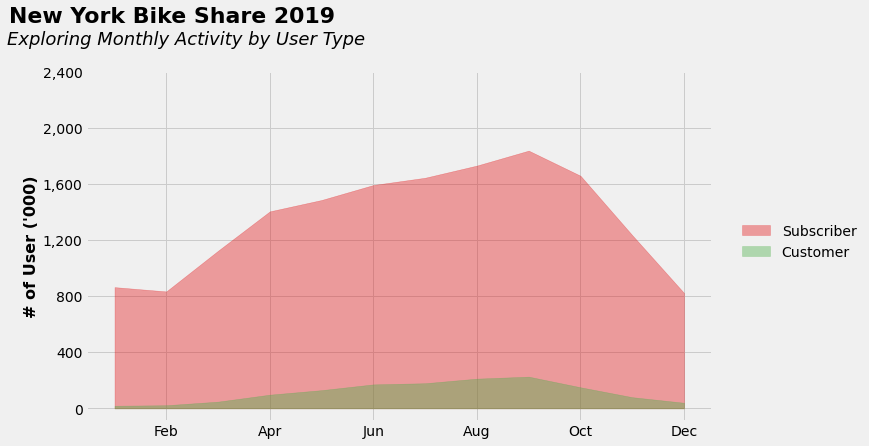

In [ ]:
# reproduce with area plot

with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize = (10, 6))

    ax.fill_between(monthly_subscriber.index.month, monthly_subscriber.subscriber.values, 
                    color=cm.Set1(0), alpha=0.4)
    ax.fill_between(monthly_customer.index.month, monthly_customer.customer.values, 
                    color=cm.Set1(2), alpha=0.4)
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.2, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Exploring Monthly Activity by User Type', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.16, 1.06])
    
    # set axes ticks & ticklabels
    xloc = np.arange(2, 14, 2)
    xlab = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
    ax.set_xticks(xloc)
    ax.set_xticklabels(xlab)

    yloc = np.arange(0, 2.8e6, 0.4e6)
    ylab = [f"{int(num):,}" for num in yloc/1e3]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    ax.legend(labels = ['Subscriber', 'Customer'], frameon = False, bbox_to_anchor=(1.25, 0.6));

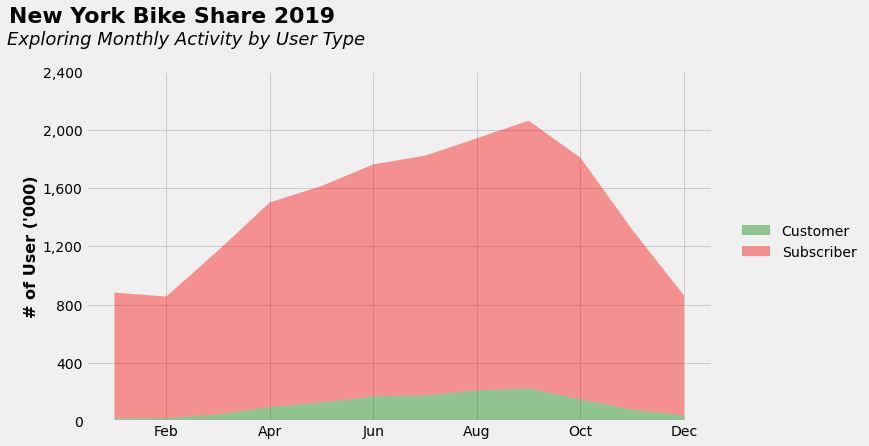

In [ ]:
# reproduce with stacked area plot

with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize = (10, 6))

    x = monthly_trend.index.month
    y = [monthly_customer.customer.to_list(), monthly_subscriber.subscriber.to_list()]
    
    ax.stackplot(x, y, labels=['customer', 'subscriber'], colors=['green', 'red'], alpha=0.4)
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.2, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Exploring Monthly Activity by User Type', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.16, 1.06])
    
    # set axes ticks & ticklabels
    xloc = np.arange(2, 14, 2)
    xlab = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec']
    ax.set_xticks(xloc)
    ax.set_xticklabels(xlab)

    yloc = np.arange(0, 2.8e6, 0.4e6)
    ylab = [f"{int(num):,}" for num in yloc/1e3]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    ax.legend(labels = ['Customer', 'Subscriber'], frameon = False, bbox_to_anchor=(1.25, 0.6));

## ***Distribution of Traveling Distance***

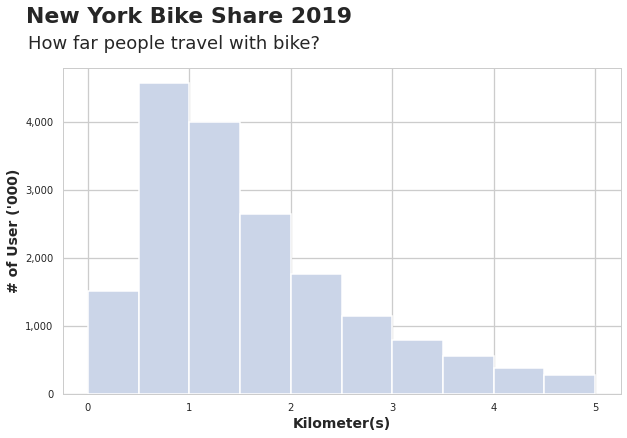

In [ ]:
with plt.style.context('seaborn-whitegrid'):

    fig, ax = plt.subplots(figsize=(10, 6))

    # set title & subtitle
    fig.suptitle('New York Bike Share 2019', fontsize=22, fontweight='bold', x=0.3, y=1.02)
    ax.set_title('How far people travel with bike?', fontdict={'fontsize': 18}, position = [0.2, 1.04])

    ax.hist(df.distance.values, color=cm.Pastel2(2), edgecolor='white', linewidth=1.5)

    # set ticks & ticklabels
    xloc = np.arange(0, 6)
    ax.set_xticks(xloc)
    ax.set_xticklabels(labels=xloc, fontdict={'fontsize': 10})
    ax.set_xlabel('Kilometer(s)', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    yloc = np.arange(0, 5e6, 1e6)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(labels=ylab, fontdict={'fontsize': 10})
    ax.set_ylabel("# of User ('000)" , fontdict={'fontsize': 14, 'fontweight': 'bold'});

## ***Distribution of Travelling Duration***

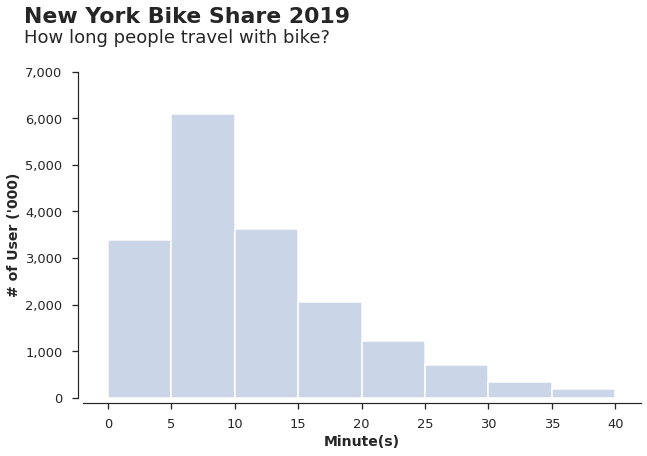

In [ ]:
with plt.style.context('seaborn-ticks'):

    fig, ax = plt.subplots(figsize=(10, 6))

    # set title & subtitle
    fig.suptitle('New York Bike Share 2019', fontsize=22, fontweight='bold', x=0.27, y=1.03)
    ax.set_title('How long people travel with bike?', fontdict={'fontsize': 18}, position = [0.17, 1.07])

    ax.hist(df.duration.values, bins=np.arange(0, 45, 5), color=cm.Pastel2(2), edgecolor='white', linewidth=1.5)
    
    # set ticks & ticklabels
    xloc = np.arange(0, 45, 5)
    ax.set_xticks(xloc)
    ax.set_xticklabels(labels=xloc, fontdict={'fontsize': 10})
    ax.set_xlabel('Minute(s)', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    yloc = np.arange(0, 8e6, 1e6)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(labels=ylab, fontdict={'fontsize': 10})
    ax.set_ylabel("# of User ('000)" , fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    # set position & linewidth of spine
    # equivalent to 'sns.despine(offset = 5)'
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_position(('outward', 5))
    ax.spines['bottom'].set_linewidth(1.2)

    # remove top & right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False);

## ***Distribution of Travelling Speed***

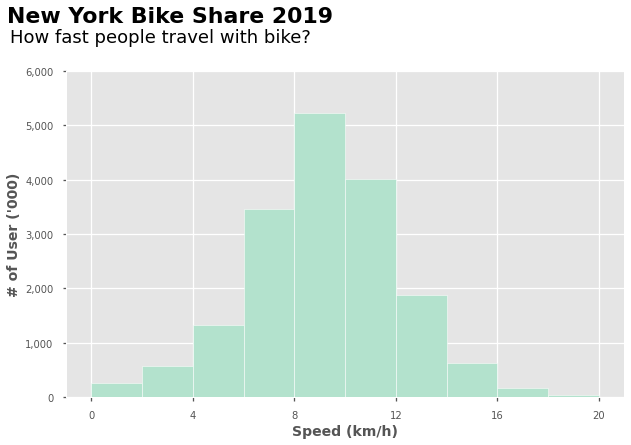

In [ ]:
with plt.style.context('ggplot'):

    fig, ax = plt.subplots(figsize=(10, 6))

    # set title & subtitle
    fig.suptitle('New York Bike Share 2019', fontsize=22, fontweight='bold', x=0.27, y=1.03)
    ax.set_title('How fast people travel with bike?', fontdict={'fontsize': 18}, position = [0.17, 1.07])

    ax.hist(df.speed.values, bins=np.arange(0, 22, 2), color=cm.Pastel2(0), edgecolor='white')
    
    # set ticks & ticklabels
    xloc = np.arange(0, 24, 4)
    ax.set_xticks(xloc)
    ax.set_xticklabels(labels=xloc, fontdict={'fontsize': 10})
    ax.set_xlabel('Speed (km/h)', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    yloc = np.arange(0, 7e6, 1e6)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(labels=ylab, fontdict={'fontsize': 10})
    ax.set_ylabel("# of User ('000)" , fontdict={'fontsize': 14, 'fontweight': 'bold'});

## ***Weekday Rountine***

In [ ]:
monday_routine = pd.DataFrame({
    'hour': df.time_start,
    'generation': df.generation,
    'record': 1
})

# only include baby_boomer, gen_x & gen_y. silent & gen_z are not significant
monday_routine = monday_routine.loc[(monday_routine.hour.dt.day_name() == 'Monday') & (monday_routine.generation.isin(['baby_boomer', 'gen_x', 'gen_y'])), :]\
                                .reset_index(drop=True)

In [ ]:
monday_all = monday_routine.loc[:, ['hour', 'record']]\
                            .set_index('hour')\
                            .resample('H').sum()

In [ ]:
monday_all = monday_all.groupby(monday_all.index.time).sum().reset_index()
monday_all

,index,record
0,00:00:00,13245
1,01:00:00,6705
2,02:00:00,3863
3,03:00:00,2685
4,04:00:00,4575
5,05:00:00,21251
6,06:00:00,69061
7,07:00:00,143073
8,08:00:00,242335
9,09:00:00,172538


In [ ]:
monday_all.describe().T

,count,mean,std,min,25%,50%,75%,max
record,24.0,102417.958333,81836.53955,2685.0,26724.5,99879.0,146870.25,271757.0


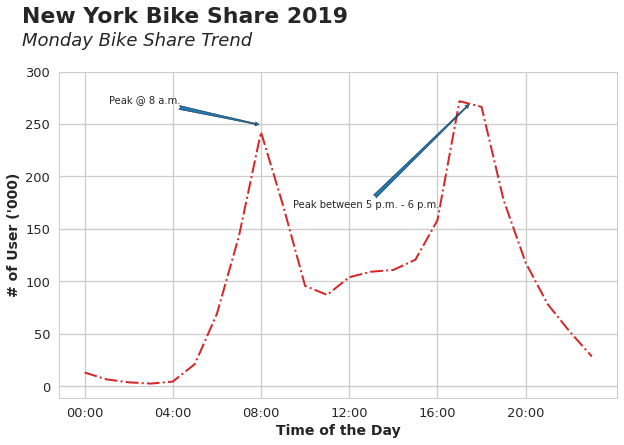

In [ ]:
with plt.style.context('seaborn-whitegrid'):

    fig, ax = plt.subplots(figsize = (10, 6))

    # use pandas plotting method instead of Matplotlib method
    # pandas plot has special support for 'time' like function
    monday_all.plot(x = 'index', y = 'record', ax = ax,
                        linestyle = 'dashdot', linewidth = 2, color = cm.tab10(3))
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.3, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Monday Bike Share Trend', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.14, 1.06])
    
    # set axes ticks & ticklabels
    xloc = (4 * 60 * 60) * np.arange(6) # 4-hour interval consist of (4*60*60) seconds 
    xlab = xloc
    ax.set_xticks(xloc)

    yloc = np.arange(0, 3.5e5, 0.5e5)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_xlabel('Time of the Day', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    # set legend & positioning to None
    ax.legend(labels = [])
    
    # set text for both peak period
    ax.annotate('Peak @ 8 a.m.', xy=(28800, 249000), xytext=(4000, 270000), arrowprops={'arrowstyle': 'fancy'})
    ax.annotate('Peak between 5 p.m. - 6 p.m.', xy=(63000, 270000), xytext=(34000, 170000), arrowprops={'arrowstyle': 'fancy'});

In [ ]:
monday_routine.head()

,hour,generation,record
0,2019-01-07 00:00:10.646,gen_y,1
1,2019-01-07 00:00:25.059,baby_boomer,1
2,2019-01-07 00:00:33.004,gen_y,1
3,2019-01-07 00:00:40.816,gen_y,1
4,2019-01-07 00:00:54.318,gen_y,1


In [ ]:
# function to transform dataframe

def hour_trend(gen):

    # filter by generation
    df = monday_routine.loc[monday_routine.generation == gen, :].reset_index(drop=True)

    # resample by hour on 'hour'
    df = df.resample('H', on='hour').sum()

    # groupby 'time'
    df = df.groupby(df.index.time).sum().reset_index()

    return df

In [ ]:
# 3 generations chosen

monday_routine.generation.unique()

['gen_y', 'baby_boomer', 'gen_x']
Categories (3, object): ['gen_y', 'baby_boomer', 'gen_x']

In [ ]:
# apply "hour_trend" function to each "generation"

baby_boomer, gen_x, gen_y = list(map(hour_trend, ['baby_boomer', 'gen_x', 'gen_y']))

# rename the column
baby_boomer.rename(columns={'record': 'baby_boomer'}, inplace=True)
gen_x.rename(columns={'record': 'gen_x'}, inplace=True)
gen_y.rename(columns={'record': 'gen_y'}, inplace=True)

In [ ]:
monday_routine = reduce(lambda left, right: pd.merge(left, right, on = 'index'), [baby_boomer, gen_x, gen_y])
monday_routine.head()

,index,baby_boomer,gen_x,gen_y
0,00:00:00,1395,3629,8221
1,01:00:00,863,1818,4024
2,02:00:00,641,1029,2193
3,03:00:00,466,805,1414
4,04:00:00,1041,1377,2157


In [ ]:
monday_routine.iloc[:, [1, 2, 3]].describe().T

,count,mean,std,min,25%,50%,75%,max
baby_boomer,24.0,14003.666667,10629.157440,466.0,3118.25,15654.5,21468.75,34963.0
gen_x,24.0,32112.708333,26075.125454,805.0,7427.75,30855.5,45994.25,90186.0
gen_y,24.0,56301.583333,46531.688867,1414.0,16470.00,51298.0,76130.50,162021.0


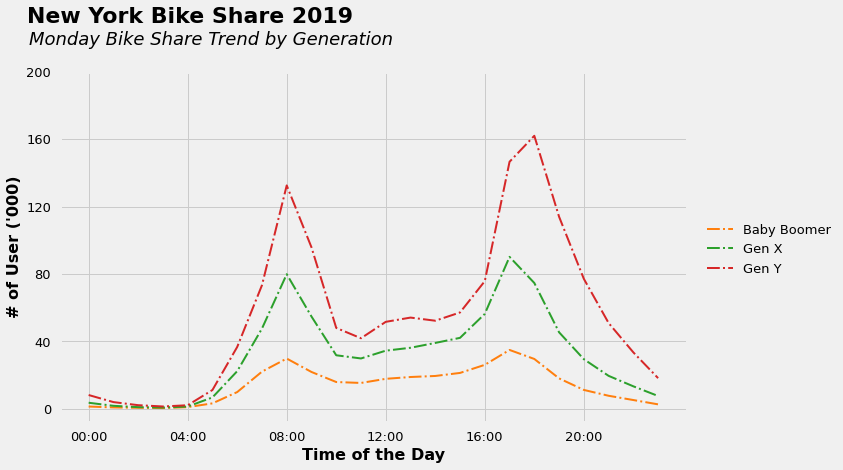

In [ ]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize = (10, 6))

    # use pandas plotting method instead of Matplotlib method
    # pandas plot has special support for 'time' like function
    monday_routine.plot(x = 'index', y = ['baby_boomer', 'gen_x', 'gen_y'], ax = ax,
                        linestyle = 'dashdot', linewidth = 2, color = cm.tab20([2, 4, 6]))
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.26, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Monday Bike Share Trend by Generation', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.24, 1.06])
    
    # set axes ticks & ticklabels
    xloc = (4 * 60 * 60) * np.arange(6) # 4-hour interval consist of (4*60*60) seconds 
    xlab = xloc
    ax.set_xticks(xloc)

    yloc = np.arange(0, 2.4e5, 0.4e5)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_xlabel('Time of the Day', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    # set legend & positioning
    ax.legend(labels = ['Baby Boomer', 'Gen X', 'Gen Y'], frameon = False, bbox_to_anchor=(1.25, 0.6));

## ***Weekend Routine***

In [ ]:
sunday_routine = pd.DataFrame({
    'hour': df.time_start,
    'generation': df.generation,
    'record': 1
})\
.query(" hour.dt.day_name() == 'Sunday' & (generation == 'baby_boomer' or generation == 'gen_x' or generation == 'gen_y') ")\
.reset_index(drop=True)

In [ ]:
sunday_routine.generation.unique()

['gen_x', 'gen_y', 'baby_boomer']
Categories (3, object): ['gen_x', 'gen_y', 'baby_boomer']

In [ ]:
# function to transform dataframe

def hour_trend(gen):

    # filter by generation
    df = sunday_routine.loc[sunday_routine.generation == gen, :].reset_index(drop=True)

    # resample by hour on 'hour'
    df = df.resample('H', on='hour').sum()

    # groupby 'time'
    df = df.groupby(df.index.time).sum().reset_index()

    return df

In [ ]:
# apply "hour_trend" function to each "generation"

baby_boomer, gen_x, gen_y = list(map(hour_trend, ['baby_boomer', 'gen_x', 'gen_y']))

# rename the column
baby_boomer.rename(columns={'record': 'baby_boomer'}, inplace=True)
gen_x.rename(columns={'record': 'gen_x'}, inplace=True)
gen_y.rename(columns={'record': 'gen_y'}, inplace=True)

In [ ]:
sunday_routine = reduce(lambda left, right: pd.merge(left, right, on = 'index'), [baby_boomer, gen_x, gen_y])
sunday_routine.describe().T

,count,mean,std,min,25%,50%,75%,max
baby_boomer,24.0,9130.958333,7083.693181,671.0,2254.25,7937.0,16648.50,18601.0
gen_x,24.0,19935.666667,15043.437008,1183.0,6259.50,17329.0,35846.50,40048.0
gen_y,24.0,47601.125000,36116.178529,2599.0,14480.50,40117.0,85791.75,96300.0


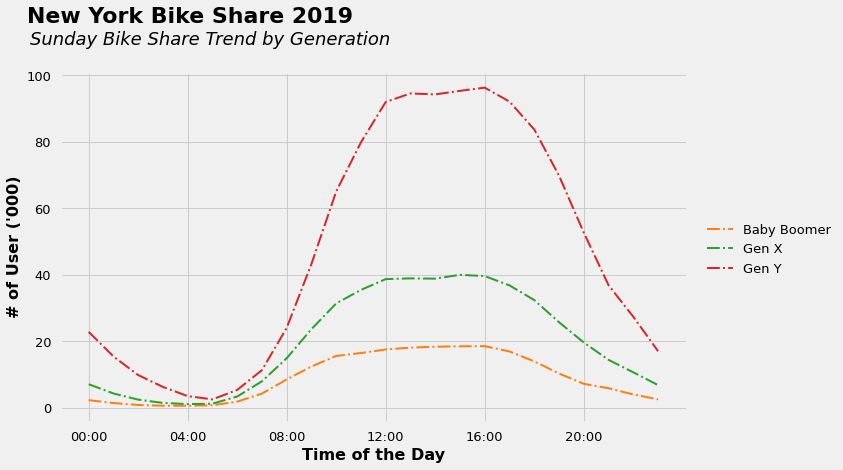

In [ ]:
with plt.style.context('fivethirtyeight'):

    fig, ax = plt.subplots(figsize = (10, 6))

    # use pandas plotting method instead of Matplotlib method
    # pandas plot has special support for 'time' like function
    sunday_routine.plot(x = 'index', y = ['baby_boomer', 'gen_x', 'gen_y'], ax = ax,
                        linestyle = 'dashdot', linewidth = 2, color = cm.tab20([2, 4, 6]))
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.26, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Sunday Bike Share Trend by Generation', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.24, 1.06])
    
    # set axes ticks & ticklabels
    xloc = (4 * 60 * 60) * np.arange(6) # 4-hour interval consist of (4*60*60) seconds 
    xlab = xloc
    ax.set_xticks(xloc)

    yloc = np.arange(0, 120_000, 20_000)
    ylab = [f"{int(num):,}" for num in yloc/1000]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_xlabel('Time of the Day', fontdict={'fontsize': 16, 'fontweight': 'bold'})
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})
    
    # set legend & positioning
    ax.legend(labels = ['Baby Boomer', 'Gen X', 'Gen Y'], frameon = False, bbox_to_anchor=(1.25, 0.6));

## ***Daily Bike Sharing: Customer vs Subscriber***

In [ ]:
user_behaviour = pd.DataFrame({
    'day': df.time_start.dt.day_name(),
    'user': df.user_type,
    'record': 1
})\
.astype({'day': 'category', 'user': 'category'})

In [ ]:
user_behaviour.head()

,day,user,record
0,Tuesday,Subscriber,1
1,Tuesday,Subscriber,1
2,Tuesday,Subscriber,1
3,Tuesday,Subscriber,1
4,Tuesday,Subscriber,1


In [ ]:
user_behaviour = user_behaviour.groupby(['day', 'user'], as_index=False).sum()
user_behaviour

,day,user,record
0,Friday,Customer,188743
1,Friday,Subscriber,2518675
2,Monday,Customer,162790
3,Monday,Subscriber,2377076
4,Saturday,Customer,325411
5,Saturday,Subscriber,1909879
6,Sunday,Customer,251916
7,Sunday,Subscriber,1657895
8,Thursday,Customer,148707
9,Thursday,Subscriber,2495705


In [ ]:
user_behaviour = user_behaviour.pivot_table(values='record', index='day', columns='user', aggfunc='sum')
user_behaviour

user,Customer,Subscriber
day,,
Friday,188743,2518675
Monday,162790,2377076
Saturday,325411,1909879
Sunday,251916,1657895
Thursday,148707,2495705
Tuesday,152475,2628451
Wednesday,147206,2630717


In [ ]:
user_behaviour = user_behaviour.reindex(labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
user_behaviour

user,Customer,Subscriber
day,,
Sunday,251916,1657895
Monday,162790,2377076
Tuesday,152475,2628451
Wednesday,147206,2630717
Thursday,148707,2495705
Friday,188743,2518675
Saturday,325411,1909879


In [ ]:
user_behaviour.describe().T

,count,mean,std,min,25%,50%,75%,max
user,,,,,,,,
Customer,7.0,1.967497e+05,67746.276079,147206.0,150591.0,162790.0,220329.5,325411.0
Subscriber,7.0,2.316914e+06,381183.321559,1657895.0,2143477.5,2495705.0,2573563.0,2630717.0


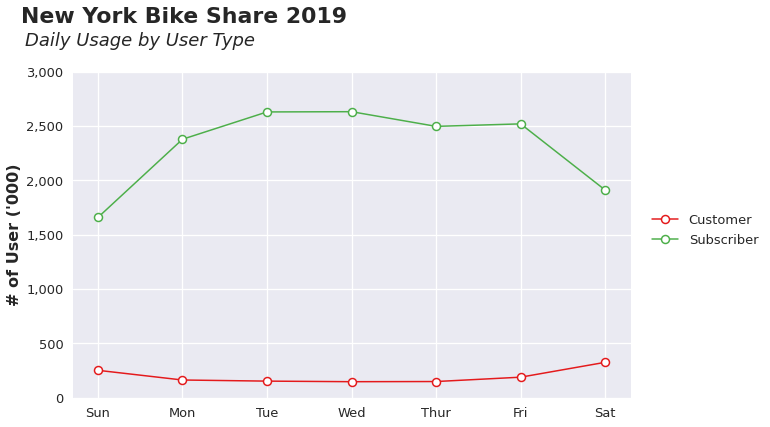

In [ ]:
with plt.style.context('seaborn-darkgrid'):

    fig, ax = plt.subplots(figsize = (10, 6))

    ax.plot(user_behaviour.index, user_behaviour.Customer, 
            marker='.', markersize=16,  markerfacecolor='white', markeredgewidth=1.5, markeredgecolor=cm.Set1(0),
            color=cm.Set1(0) ,linestyle='solid', linewidth=1.5)
    
    ax.plot(user_behaviour.index, user_behaviour.Subscriber, 
            marker='.', markersize=16,  markerfacecolor='white', markeredgewidth=1.5, markeredgecolor=cm.Set1(2),
            color=cm.Set1(2) ,linestyle='solid', linewidth=1.5)
    
    # set major title with figure 'suptitle' and subtitle with axes 'set_title'
    fig.suptitle('New York Bike Share 2019', x=0.28, y=1.03, fontsize=22, fontweight='bold')
    ax.set_title('Daily Usage by User Type', fontdict={'fontsize': 18, 'style': 'italic'}, position = [0.12, 1.06])
    
    # set axes ticks & ticklabels
    xloc = np.arange(7)
    xlab = ['Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat']
    ax.set_xticks(xloc)
    ax.set_xticklabels(xlab)

    yloc = np.arange(0, 3.5e6, 0.5e6)
    ylab = [f"{int(num):,}" for num in yloc/1e3]
    ax.set_yticks(yloc)
    ax.set_yticklabels(ylab)
    
    # set axes label
    ax.set_ylabel("# of User ('000)", fontdict={'fontsize': 16, 'fontweight': 'bold'})

    # set legend & positioning
    ax.legend(labels = ['Customer', 'Subscriber'], frameon = False, bbox_to_anchor=(1.25, 0.6));

## ***Correlation: Duration, Distance & Speed***

In [ ]:
# 'duration' & 'distance' have strong & positive correlation; r = 0.75

cor = df.loc[:, ['duration', 'distance', 'speed']].corr().round(2)
cor

,duration,distance,speed
duration,1.00,0.75,-0.36
distance,0.75,1.00,0.23
speed,-0.36,0.23,1.00


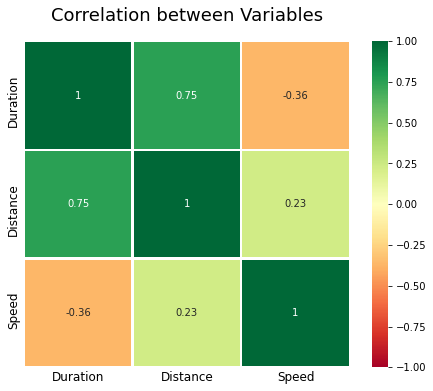

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

ax.set_title('Correlation between Variables', fontdict = {'fontsize': 18}, pad=20)

sns.heatmap(data=cor, vmin=-1, cmap=cm.RdYlGn, annot=True, linewidths=1.5, 
            square=True, ax=ax)

# to hide ticks on x-axis & y-axis
ax.tick_params(axis = 'both', length = 0)

# adjust yticks position upward
xloc = ax.get_yticks()
ax.set_yticks(xloc - 0.15)

# set ticklabels for both axes 
# equivalent to seaborn heatmap parameters xticklabels/yticklabels, however, matplotlib method gives more control over fontsize
ax.set_xticklabels(labels=['Duration', 'Distance', 'Speed'], fontdict={'fontsize': 12})
ax.set_yticklabels(labels=['Duration', 'Distance', 'Speed'], fontdict={'fontsize': 12});

In [ ]:
df_sample = df.sample(frac=0.01, random_state=100, axis='index')\
                .loc[:, ['duration', 'distance', 'speed']]\
                .reset_index(drop=True)

In [ ]:
df_sample.head(10)

,duration,distance,speed
0,26.299999,3.569,8.1
1,6.000000,0.739,7.4
2,25.700001,2.203,5.1
3,34.400002,2.876,5.0
4,3.000000,0.656,13.1
5,29.299999,3.704,7.6
6,10.200000,2.076,12.2
7,4.000000,0.774,11.6
8,9.200000,1.574,10.3
9,10.800000,0.782,4.3


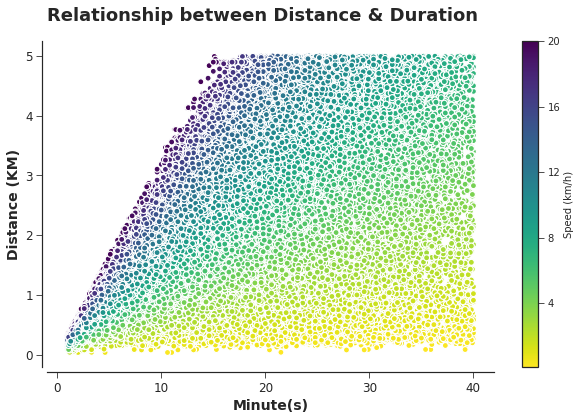

In [ ]:
with plt.style.context('seaborn-ticks'):

    fig, ax = plt.subplots(figsize = (10, 6))

    # set title
    ax.set_title('Relationship between Distance & Duration', 
                 fontdict={'fontsize': 18, 'fontweight': 'bold'}, loc='left', pad=20)

    # assign scatter plot to 't' and to be used as mapper in colorbar
    t = ax.scatter(x=df_sample.duration.values, y=df_sample.distance.values, 
                   c=df_sample.speed.values, cmap=cm.viridis_r, linewidth=1.2, edgecolors='white')

    # remove top & right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # equivalent to 'sns.despine(offset = 5)'
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_position(('outward', 5))
    ax.spines['bottom'].set_linewidth(1.2)
    
    # set ticks & ticklabels
    xloc = np.arange(0, 50, 10)
    ax.set_xticks(xloc)
    ax.set_xticklabels(labels=xloc, fontdict={'fontsize': 12})
    ax.set_xlabel('Minute(s)', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    yloc = np.arange(6)
    ylab = [f"{int(num)}" for num in yloc]
    ax.set_yticks(yloc)
    ax.set_yticklabels(labels=ylab, fontdict={'fontsize': 12})
    ax.set_ylabel("Distance (KM)" , fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    # map colorbar with scatter plot (t)
    fig.colorbar(mappable=t, ax=ax, ticks=np.arange(4, 24, 4), label='Speed (km/h)');

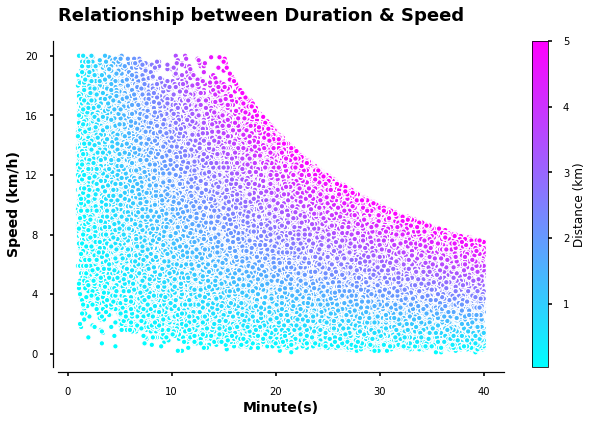

In [ ]:
with plt.style.context('seaborn-poster'):

    fig, ax = plt.subplots(figsize = (10, 6))

    # set title
    ax.set_title('Relationship between Duration & Speed', 
                 fontdict={'fontsize': 18, 'fontweight': 'bold'}, loc='left', pad=20)

    # assign scatter plot to 't' and to be used as mapper in colorbar
    t = ax.scatter(x=df_sample.duration.values, y=df_sample.speed.values, 
                   c=df_sample.distance.values, cmap=cm.cool, 
                   linewidth=1.2, edgecolors='white', s=30)

    # remove top & right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # equivalent to 'sns.despine(offset = 5)'
    ax.spines['left'].set_position(('outward', 5))
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_position(('outward', 5))
    ax.spines['bottom'].set_linewidth(1.2)
    
    # set ticks & ticklabels
    xloc = np.arange(0, 50, 10)
    ax.set_xticks(xloc)
    ax.set_xticklabels(labels=xloc, fontdict={'fontsize': 10})
    ax.set_xlabel('Minute(s)', fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    yloc = np.arange(0, 24, 4)
    ylab = [f"{int(num)}" for num in yloc]
    ax.set_yticks(yloc)
    ax.set_yticklabels(labels=ylab, fontdict={'fontsize': 10})
    ax.set_ylabel("Speed (km/h)" , fontdict={'fontsize': 14, 'fontweight': 'bold'})
    
    # map colorbar with scatter plot (t)
    cbar = fig.colorbar(mappable=t, ax=ax)

    # set label size for colorbar
    cbar.ax.tick_params(labelsize=10)

    # set label for colorbar
    cbar.ax.set_ylabel(ylabel='Distance (km)', fontdict={'fontsize': 12});

## ***Multivariate Analysis: Gender mix by Generation & User Type***

In [ ]:
gender_mix = pd.DataFrame({
    'user': df.user_type,
    'generation': df.generation,
    'gender': df.gender,
    'record': 1
})\
.groupby(by=['user', 'generation', 'gender'], as_index=False).agg({'record': np.sum})\
.reset_index(drop=True)

gender_mix

,user,generation,gender,record
0,Customer,baby_boomer,Female,19458
1,Customer,baby_boomer,Male,37510
2,Customer,gen_x,Female,75333
3,Customer,gen_x,Male,157443
4,Customer,gen_y,Female,340061
5,Customer,gen_y,Male,607945
6,Customer,gen_z,Female,44980
7,Customer,gen_z,Male,93751
8,Customer,silent,Female,159
9,Customer,silent,Male,608


In [ ]:
# calculate 'percent" of gender by generation & user

gender_mix['percent'] = gender_mix\
                        .groupby(['user', 'generation'])['record']\
                        .transform(lambda x: round((x/sum(x)*100)).astype(int))

gender_mix                    

,user,generation,gender,record,percent
0,Customer,baby_boomer,Female,19458,34
1,Customer,baby_boomer,Male,37510,66
2,Customer,gen_x,Female,75333,32
3,Customer,gen_x,Male,157443,68
4,Customer,gen_y,Female,340061,36
5,Customer,gen_y,Male,607945,64
6,Customer,gen_z,Female,44980,32
7,Customer,gen_z,Male,93751,68
8,Customer,silent,Female,159,21
9,Customer,silent,Male,608,79


In [ ]:
# filter data frame by user type

customer = gender_mix.query(" user == 'Customer' ").reset_index(drop=True)
subscriber = gender_mix.query(" user == 'Subscriber' ").reset_index(drop=True)

# remove unused categories

customer.user.cat.remove_unused_categories(inplace=True)
subscriber.user.cat.remove_unused_categories(inplace=True)

In [ ]:
customer

,user,generation,gender,record,percent
0,Customer,baby_boomer,Female,19458,34
1,Customer,baby_boomer,Male,37510,66
2,Customer,gen_x,Female,75333,32
3,Customer,gen_x,Male,157443,68
4,Customer,gen_y,Female,340061,36
5,Customer,gen_y,Male,607945,64
6,Customer,gen_z,Female,44980,32
7,Customer,gen_z,Male,93751,68
8,Customer,silent,Female,159,21
9,Customer,silent,Male,608,79


In [ ]:
subscriber

,user,generation,gender,record,percent
0,Subscriber,baby_boomer,Female,530056,24
1,Subscriber,baby_boomer,Male,1695197,76
2,Subscriber,gen_x,Female,1119945,23
3,Subscriber,gen_x,Male,3811786,77
4,Subscriber,gen_y,Female,2319716,27
5,Subscriber,gen_y,Male,6304151,73
6,Subscriber,gen_z,Female,74390,21
7,Subscriber,gen_z,Male,284011,79
8,Subscriber,silent,Female,20133,25
9,Subscriber,silent,Male,59013,75


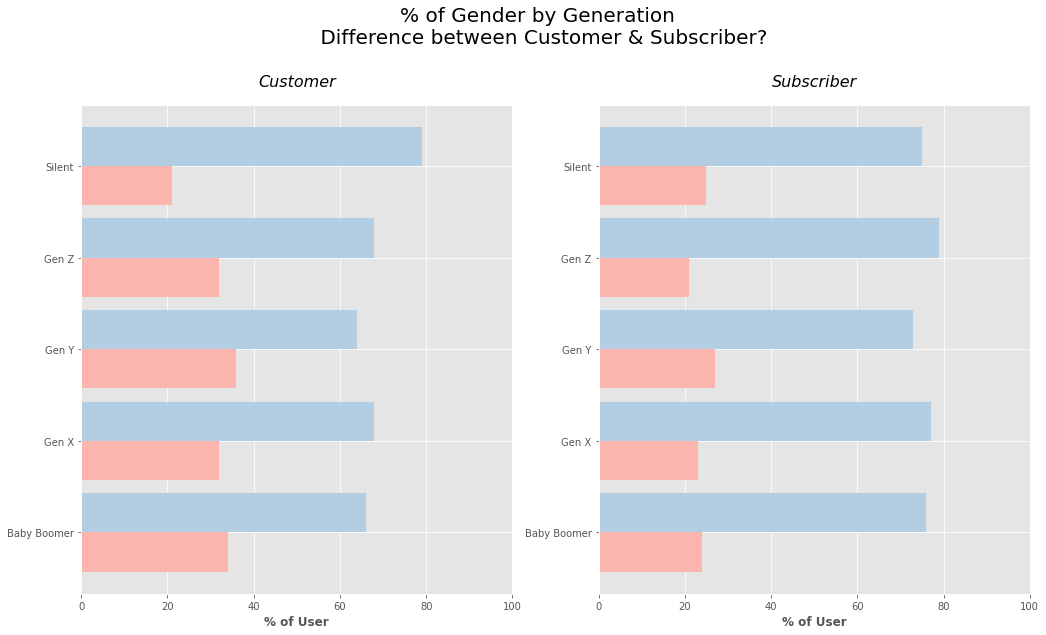

In [ ]:
# subplots with Matplotlib Grouped Bar Chart

with plt.style.context('ggplot'):
    
    # create a figure with axes in the form of 1 row & 2 columns
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (17, 9))

    # set position of bar chart at y axis
    x_pos1 = np.arange(len(customer.generation.unique())) * 3.5
    x_pos2 = x_pos1 + 1.5

    # set major title and title of each axis
    fig.suptitle(t = '% of Gender by Generation \n Difference between Customer & Subscriber?', fontsize=20, y = 1, va = 'center')
    ax[0].set_title(label='Customer', fontdict={'fontsize': 16, 'fontstyle': 'italic'}, y = 1.025)
    ax[1].set_title(label='Subscriber', fontdict={'fontsize': 16, 'fontstyle': 'italic'}, y = 1.025)

    # create horizontal bar charts
    # ax '0' for customer & '1' for subscriber
    ax[0].barh(x_pos1, customer.percent[0::2], color=cm.Pastel1(0), height=1.5)
    ax[0].barh(x_pos2, customer.percent[1::2], color=cm.Pastel1(1), height=1.5)
    ax[1].barh(x_pos1, subscriber.percent[0::2], color=cm.Pastel1(0), height=1.5)
    ax[1].barh(x_pos2, subscriber.percent[1::2], color=cm.Pastel1(1), height=1.5)

    # set yticks & labels
    ax[0].set_yticks([num+0.75 for num in x_pos1])
    ax[0].set_yticklabels([gen.replace('_', ' ').title() for gen in customer.generation.unique()], fontdict={'fontsize': 10})
    ax[1].set_yticks([num+0.75 for num in x_pos1])
    ax[1].set_yticklabels([gen.replace('_', ' ').title() for gen in subscriber.generation.unique()], fontdict={'fontsize': 10})

    # set xticks & labels
    ax[0].set_xticks(np.arange(0, 120, 20))
    ax[0].set_xticklabels(np.arange(0, 120, 20), fontdict={'fontsize': 10})
    ax[0].set_xlabel('% of User', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    ax[1].set_xticks(np.arange(0, 120, 20))
    ax[1].set_xticklabels(np.arange(0, 120, 20), fontdict={'fontsize': 10})
    ax[1].set_xlabel('% of User', fontdict={'fontsize': 12, 'fontweight': 'bold'});

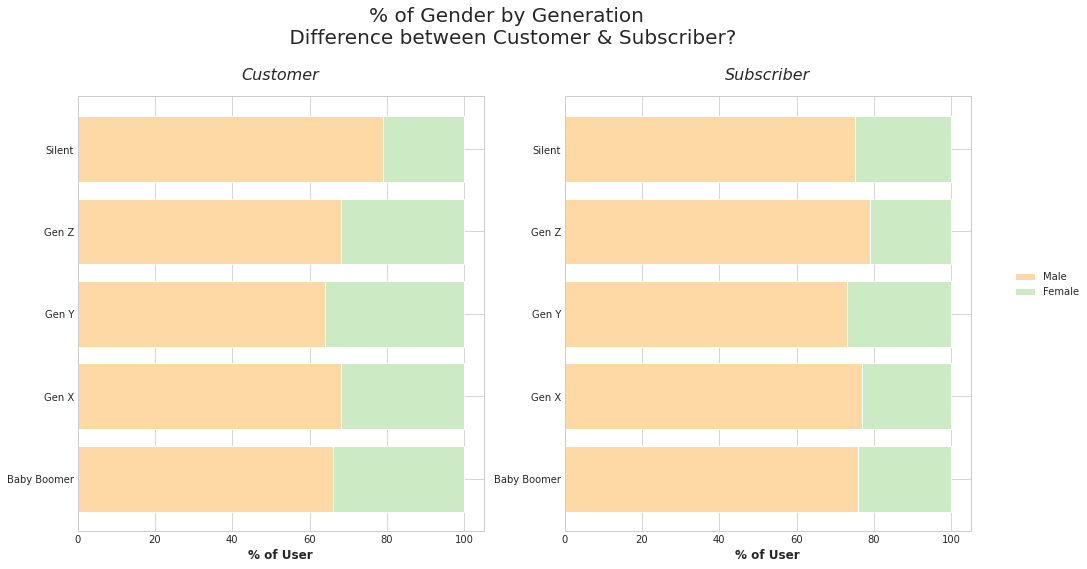

In [ ]:
# subplots with Matplotlib Stacked Bar Chart

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 8))

    # set position of bar chart at y axis
    y_pos = np.arange(len(customer.generation.unique()))
    y_lab = customer.generation.unique()

    # create horizontal bar charts
    ax[0].barh(y_pos, customer.percent[1::2], edgecolor='white', color=cm.Pastel1(4))
    ax[0].barh(y_pos, customer.percent[0::2], left=customer.percent[1::2], edgecolor='white', color=cm.Pastel1(2))
    ax[1].barh(y_pos, subscriber.percent[1::2], edgecolor='white', color=cm.Pastel1(4))
    ax[1].barh(y_pos, subscriber.percent[0::2], left=subscriber.percent[1::2], edgecolor='white', color=cm.Pastel1(2))

    # set title
    fig.suptitle(t = '% of Gender by Generation \n Difference between Customer & Subscriber?', fontsize=20, y = 1, va = 'center')
    ax[0].set_title(label='Customer', fontdict={'fontsize': 16, 'fontstyle': 'italic'}, y = 1.025)
    ax[1].set_title(label='Subscriber', fontdict={'fontsize': 16, 'fontstyle': 'italic'}, y = 1.025)

    # set yticks & labels
    ax[0].set_yticks(y_pos)
    ax[0].set_yticklabels([gen.replace('_', ' ').title() for gen in y_lab], fontdict={'fontsize': 10})
    ax[0].set_xlabel('% of User', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    ax[1].set_yticks(y_pos)
    ax[1].set_yticklabels([gen.replace('_', ' ').title() for gen in y_lab], fontdict={'fontsize': 10})
    ax[1].set_xlabel('% of User', fontdict={'fontsize': 12, 'fontweight': 'bold'})
    
    # set legend
    fig.legend(['Male', 'Female'], loc='center right');

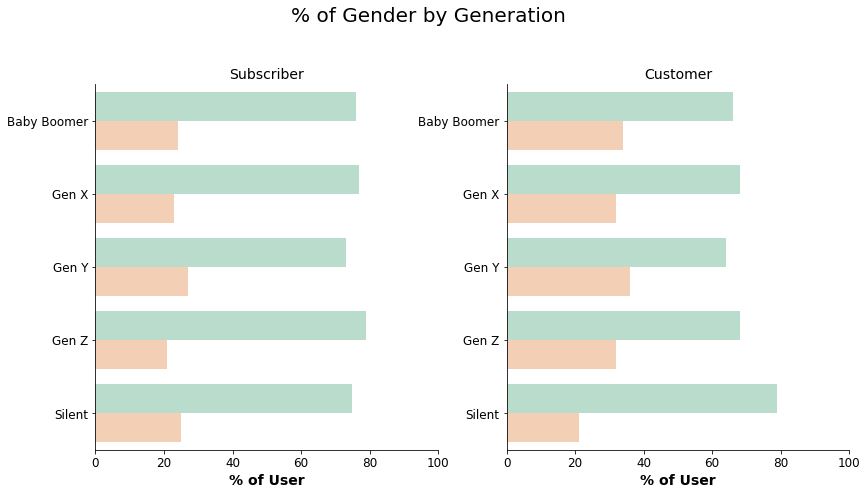

In [ ]:
# reproduce subplots with Seaborn FacetGrid

g = sns.FacetGrid(gender_mix, col='user', col_order=['Subscriber', 'Customer'], margin_titles=True, height=6, aspect=1, sharey=False)
g.map_dataframe(sns.barplot, 'percent', 'generation', hue='gender', hue_order=['Male', "Female"], palette='Pastel2')

plt.suptitle(t = '% of Gender by Generation', y = 1.1, va = 'center', fontsize = 20)

# setting vertical gap between axes
plt.subplots_adjust(wspace = 0.2)

ax1 = g.facet_axis(0, 0)
ax2 = g.facet_axis(0 ,1)

ax1.set_title(label='Subscriber', fontdict={'fontsize': 14})
ax2.set_title(label='Customer', fontdict={'fontsize': 14})

ax1.set_xticks(np.arange(0, 120, 20))
ax1.set_xticklabels([num for num in np.arange(0, 120, 20)], fontdict={'fontsize': 12})
ax1.set_xlabel('% of User', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax1.set_yticks([0, 1, 2, 3, 4])
ax1.set_yticklabels(['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Silent'], fontdict={'fontsize': 12})
ax1.set_ylabel('')

ax2.set_xticks(np.arange(0, 120, 20))
ax2.set_xticklabels([num for num in np.arange(0, 120, 20)], fontdict={'fontsize': 12})
ax2.set_xlabel('% of User', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax2.set_yticks([0, 1, 2, 3, 4])
ax2.set_yticklabels(['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Silent'], fontdict={'fontsize': 12})
ax2.set_ylabel('');

## ***Travel Speed by Gender***

In [ ]:
male = df.loc[df.gender == 'Male', 'speed'].reset_index(drop=True)
female = df.loc[df.gender == 'Female', 'speed'].reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


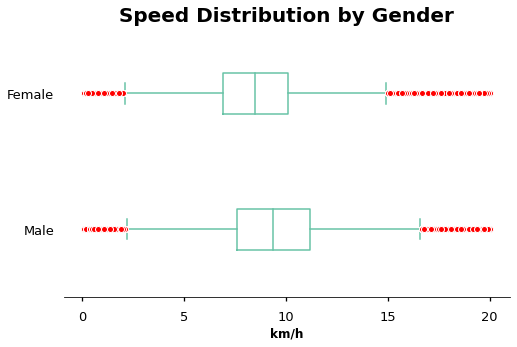

In [ ]:
# Visualize speed by gender with boxplot

with plt.style.context('seaborn-talk'):

    fig, ax = plt.subplots(figsize = (8, 5))

    ax.set_title(label='Speed Distribution by Gender', fontdict={'fontsize': 20, 'fontweight': 'bold'}, loc='center', pad=4)

    ax.boxplot([male, female], labels=['Male', 'Female'],
               positions=np.arange(0, 2),
               vert=False, 
               widths=0.3,
               boxprops=dict(color=cm.Set2(0), linewidth=1.5),
               whiskerprops=dict(color=cm.Set2(0), linewidth=1.5),
               capprops=dict(color=cm.Set2(0), linewidth=1.5),
               medianprops=dict(color=cm.Set2(0), linewidth=1.5),
               flierprops=dict(marker='.', markerfacecolor='red', markeredgecolor='white', markersize=12, linewidth=3))

    # remove spine
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # to hide ticks on x-axis & y-axis
    ax.tick_params(axis = 'y', length = 0)

    ax.set_xticks(np.arange(0, 25, 5))
    ax.set_xticklabels([0, 5, 10, 15, 20])
    
    ax.set_xlabel(xlabel="km/h", fontdict={'fontsize': 12, 'fontweight': 'bold'});